In [1]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
# Importando dataset 
df = pd.read_csv("https://raw.githubusercontent.com/md-lorente/data/master/datos_facturas.csv", sep = ';', decimal = ',')

In [3]:
# Visualizando dataset
df.head(5)

,id,fecha,mes,cliente,factura_pagada,importe_factura,tipo_IVA,porcentaje_IVA,IVA,total_pagado
0,1,01/01/2010,Enero,clienteA,si,100,normal,18,18.0,118.0
1,2,02/01/2010,Enero,clienteB,no,150,normal,18,27.0,177.0
2,3,03/01/2010,Enero,clienteC,si,75,normal,18,13.5,88.5
3,4,04/01/2010,Enero,clienteD,si,200,normal,18,36.0,236.0
4,5,05/01/2010,Enero,clienteA,no,125,normal,18,22.5,147.5


In [4]:
# Resumen información del fichero
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               45 non-null     int64  
 1   fecha            45 non-null     object 
 2   mes              45 non-null     object 
 3   cliente          45 non-null     object 
 4   factura_pagada   45 non-null     object 
 5   importe_factura  45 non-null     int64  
 6   tipo_IVA         45 non-null     object 
 7   porcentaje_IVA   45 non-null     int64  
 8   IVA              45 non-null     float64
 9   total_pagado     45 non-null     float64
dtypes: float64(2), int64(3), object(5)
memory usage: 3.6+ KB
None


In [40]:
print(df["cliente"].value_counts())

clienteA    14
clienteB    11
clienteD    11
clienteC     9
Name: cliente, dtype: int64


**Análisis del tipo de variables con que se trabajará:**

**1. Id:** identificador correlativo y secuencial del número de registros de facturas. Esta variable es usada para agilizar el cruce de información y que, al mismo tiempo, no aporta información para el análisis de los datos, por lo que, no se clasifica como análitica o de clasificación. 

**2. Fecha:** fecha en la que se generó la factura. La naturaleza de la variable es **cuantitativa continua**, a nivel de dataset viene expresada como una variable de tipo **object** (cualitativa ordinal), ya que podemos ordenar los datos por la fecha específica en que sucedió cada pago. Por otro lado podemos ver que empezó el 01 enero de 2010 y hay pagos registrados en días posteriores. Por último a nivel de análisis de datos corresponde a una variable de **clasificación**, porque sus categorías o grupos son mutuamente excluyentes.

**3. Mes:** mes en la que se generó la factura. La naturaleza de la variable es **cualitativa ordinal**, a nivel de dataset viene expresada como una variable de tipo **object** (cualitativa ordinal), ya que podemos ordenar los datos por el mes en que sucedió cada pago. Por último a nivel de análisis de datos corresponde a una variable de **clasificación**, porque sus categorías o grupos son mutuamente excluyentes.

**4. Cliente:** tipo de cliente, clasificado de la A a la D. La naturaleza de la variable es **cualitativa nominal**, ya que ningún cliente es más importante que otro. A nivel de dataset viene expresada como una variable de tipo **object** (cualitativa) y aqui se pueden tener dos interpretaciones: si consideramos que el cliente A y el B son iguales, sería una variable nominal, pero si consideramos que el cliente A es primero que el B y este a su vez que el C y así podemos decir que es una variable ordinal, porque hay un orden. A nivel de dataset no es claro, si existe este orden, aunque las letras se pueden ordenar y por lo tanto, solo tomando el orden de las letras, sería una variable de tipo ordinal. Por último a nivel de análisis de datos corresponde a una variable de **clasificación**, porque sus categorías o grupos son mutuamente excluyentes.

**5. Factura pagada:** descriptivo de si está pagada o no, en la fecha de generación. La naturaleza de la variable es **cualitativa binaria o dicotómica simétrica**, a nivel de dataset viene expresada como una variable de tipo **object** (cualitativa dicotómica simétrica) ya que solo tiene dos posibles categorías y estas no son 1 o 0; y a nivel de análisis de datos corresponde a una variable **categórica y analítica** (teniendo en cuenta que sólo se puede medir la frecuencia en este apartado).

**6. Importe factura:** importe neto sin el IVA. La naturaleza de la variable es **cuantitativa continua**, ya que corresponde a una variable que puede tomar cualquier valor dentro de un intervalo. A nivel de dataset viene expresada como una variable de tipo **integer** (cuantitativa discreta). Por último a nivel de análisis de datos corresponde a una variable **analítica**. 

**7. Tipo IVA:** es el tipo de impuesto aplicado (descriptivo). La naturaleza de la variable es cualitativa binaria o dicotómica simétrica, a nivel de dataset viene expresada como una variable de tipo **object** (cualitativa dicotómica simétrica) ya que solo tiene dos posibles categorías y estas no son 1 o 0; y a nivel de análisis de datos corresponde a una variable categórica y analítica (teniendo en cuenta que sólo se puede medir la frecuencia en este apartado).

**8. Porcentaje IVA:** es el porcentaje aplicado. La naturaleza de la variable es **cuantitativa continua**, ya que corresponde a una variable que puede tomar cualquier valor dentro de un intervalo. A nivel de dataset viene expresada como una variable de tipo **integer** (cuantitativa discreta).Por último a nivel de análisis de datos corresponde a una variable **analítica**. 

**9. IVA:** es el valor numérico del porcentaje correspondiente a la factura. La naturaleza de la variable es **cuantitativa continua**, ya que corresponde a una variable que puede tomar cualquier valor dentro de un intervalo. A nivel de dataset viene expresada como una variable de tipo **float** (cuantitativa continua). Por último a nivel de análisis de datos corresponde a una variable **analítica**. 

**10. Total pagado:** es el importe bruto de la factura (el neto más el importe IVA). La naturaleza de la variable es **cuantitativa continua**, ya que corresponde a una variable que puede tomar cualquier valor dentro de un intervalo. A nivel de dataset viene expresada como una variable de tipo **float** (cuantitativa continua), ya que puede tomar cualquier valor posible dentro de un intervalo. Por último a nivel de análisis de datos corresponde a una variable **analítica**. 


**Medidas de centralización: media, mediana y moda.**

In [5]:
# Media
df['total_pagado'].mean()

147.30888888888887

In [6]:
# Mediana
df['total_pagado'].median()

135.0

In [7]:
# Moda
df['total_pagado'].mode()

0    118.0
1    236.0
dtype: float64

**Análisis**: a nivel de la variable "Total pagado" se puede ver que su media es de 147.3088, esto quiere decir que el total pagado de las 45 facturas es de 147.3088 euros (hay que recordar que este estadístico se ve impactado por los valores extremos, ya sean muy altos o muy bajos).

Con respecto a la mediana, obtenemos que es 135.0000 euros, esto quiere decir que del total pagado de las facturas el 50% de ellas son iguales o menores a 135.0 euros.

Por último tenemos que la moda, es decir, el valor que más se repite en nuestros datos es 118.0000 y 236.0000 euros, en este caso al ser dos modas podemos decir que es bimodal y son los totales pagados más frecuentes. 

**Medidas de dispersión: rango, varianza, desviación típica y coeficiente de variación.**

In [8]:
# Rango
df['total_pagado'].max()-df['total_pagado'].min()

206.5

In [9]:
# Varianza
df['total_pagado'].var()

3356.5935555555566

In [10]:
# Desviación típica
import math as mt
mt.sqrt(df['total_pagado'].var())

57.93611615871016

In [11]:
# Coeficiente de Variación
mt.sqrt(df['total_pagado'].var()) / df['total_pagado'].mean()

0.39329681050279197

**Análisis**: en cuanto al rango que se obtiene de restar el valor más alto con el valor más bajo, tenemos que corresponde a 206.5 euros, es decir, tenemos una dispersión total de 206.5000 euros.

La varianza obtenida es de 3356.58, esto quiere decir que la variabilidad de los datos con respecto a su media es de 3356.5935 euros. 

La desviación estándar o típica es de 57.9361 euros, dicho en otras palabras, esto quiere decir que, en media, la diferencia entre el total pagado de las distintas facturas es de 57.9361 euros.

Finalmente tenemos que el coeficiente de variación es de 0.3932, como este valor está más cercano al 0, podemos decir que hay poca variabilidad en los datos.

In [12]:
# Forma alternativa de encontrar los estadísticos solicitados:
df['total_pagado'].describe()

count     45.000000
mean     147.308889
std       57.936116
min       29.500000
25%      108.000000
50%      135.000000
75%      189.000000
max      236.000000
Name: total_pagado, dtype: float64

**Medidas de posición: rango intercuartílico, cuartil primero y decil 3.**

In [13]:
# Rango intercuartílico 
df['total_pagado'].quantile(0.75) - df['total_pagado'].quantile(0.25)

81.0

In [14]:
# Primer cuartil
df['total_pagado'].quantile(0.25)

108.0

In [15]:
# Decil 3
df['total_pagado'].quantile(0.30)

118.0

**¿Cuál es la factura que tiene como mínimo el 10% del total pagado de las facturas?**

In [16]:
# Percentil 90

p90 = df['total_pagado'].quantile(0.90)
print('La factura que tiene como mínimo el 10% del total pagado de las facturas es:', (p90), "euros")

La factura que tiene como mínimo el 10% del total pagado de las facturas es: 236.0 euros


**Análisis:** en cuanto al rango intercuartílico, que es la diferencia entre el tercer y el primer cuartil es de 81.0000 euros.

El primer cuartil (25%) es de 108.0 euros, esto quiere decir que del total pagado de las facturas el 25% de ellas son iguales o menores a 108.0000 euros.

Con respecto al decil 3 (30%) es de 118.0000 euros, esto quiere decir que del total pagado de las facturas el 30% de ellas son iguales o menores a 118.0000 euros.

Con respecto a la factura que tiene como mínimo el 10% del total pagado de las facturas, es la que tiene 236.0000 euros. 

Medidas de concentración y forma: curtosis y asimetría

Asimetría: 0.096442
Curtosis:  -0.799096


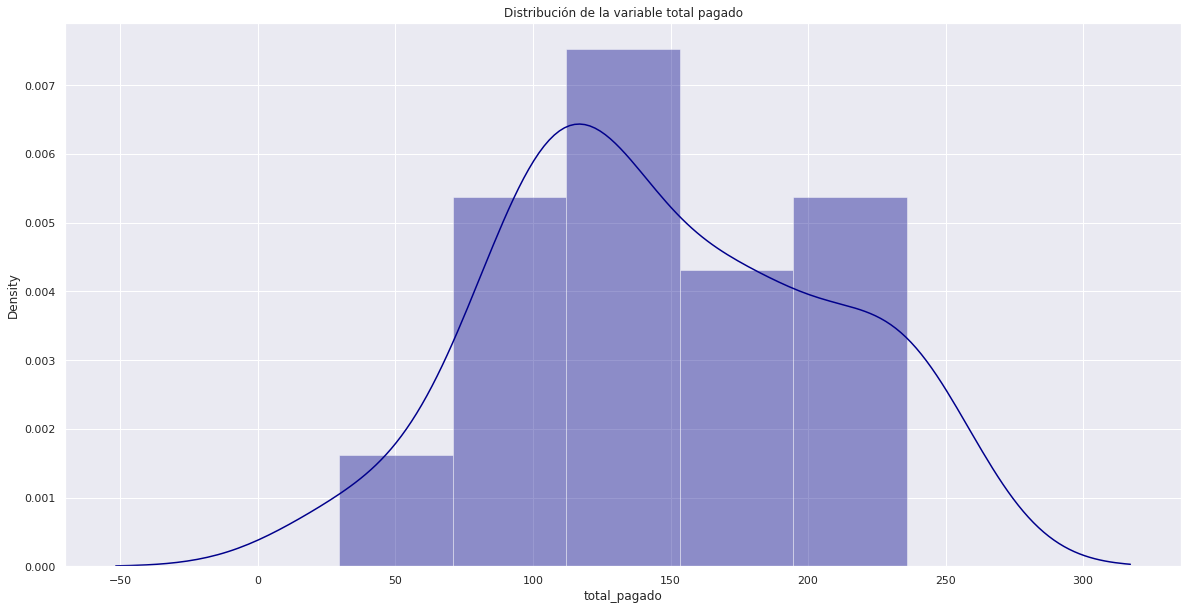

In [17]:
# Análisis de la distribución
import scipy.stats as ss
import warnings
warnings.filterwarnings('ignore')

print("Asimetría: %f" % df["total_pagado"].skew())
print("Curtosis:  %f" % df["total_pagado"].kurt())

# Gráfico de la distribución
plt.figure(figsize=(20,10))
plt.title("Distribución de la variable total pagado")
sns.distplot(df["total_pagado"], color = 'darkblue')
plt.show();

**Análisis**: en cuanto a la asimetría, tenemos una asimetría positiva o a la derecha con 0.0964. 

En cuanto a la curtosis es de -0.7990, es decir es una curtosis platicúrtica. 

**Análisis rápido con box-plot y sus medidas**

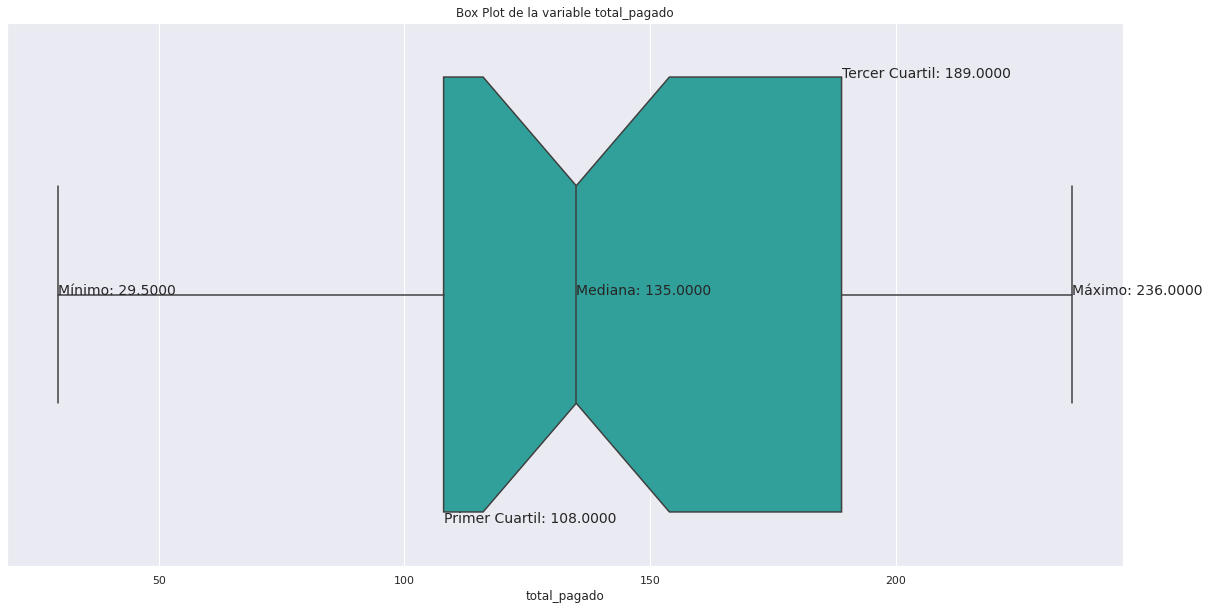

In [29]:
# Box-plot de la variable Total Pagado
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(20,10))
plt.title("Box Plot de la variable total_pagado")
sns.boxplot(df["total_pagado"], notch = True, color = "lightseagreen")
plt.text(df["total_pagado"].quantile(0.50), 0.00, "Mediana: %.4f" % df["total_pagado"].quantile(0.50), fontsize=14)
plt.text(df["total_pagado"].quantile(0.25), 0.42, "Primer Cuartil: %.4f" % df["total_pagado"].quantile(0.25), fontsize=14)
plt.text(df["total_pagado"].quantile(0.75), -0.4, "Tercer Cuartil: %.4f" % df["total_pagado"].quantile(0.75), fontsize=14)
plt.text(df["total_pagado"].quantile(0.00), 0.00, "Mínimo: %.4f" % df["total_pagado"].quantile(0.00), fontsize=14)
plt.text(df["total_pagado"].quantile(0.99), 0.00, "Máximo: %.4f" % df["total_pagado"].quantile(0.99), fontsize=14)
plt.show()

**Análisis**: con el presente boxplot se puede ver de forma rápida las principales medidas de posición. En este caso se puede visualizar como el total pagado más pequeño en el lote de datos (mínimo) es de 29.5000, la factura cuyo valor representa el más alto del set de datos (máximo) es de 236.0000, la mediana corresponde a 135.0000 euros, es decir, 50% de las facturas son iguales o inferiores a 135.000 euros,  el primer cuartil corresponde a 108.0000, es decir, 25% de las facturas son iguales o menores a 108.000 euros y finalmente el tercer cuartil corrresponde a 189.0000 euros, esto quiere decir, que el 75% de las facturas son iguales o menores a 189.000 euros. 

**Analiza los resultados e informa de quién es el cliente que ha pagado más en todas las facturas.**

In [19]:
# Tabla de doble entrada
tabla = pd.crosstab(df["cliente"], df["factura_pagada"], values=df["total_pagado"], aggfunc='sum', margins=True) 
tabla

factura_pagada,no,si,All
cliente,,,
clienteA,565.0,1534.0,2099.0
clienteB,413.0,924.0,1337.0
clienteC,570.0,584.5,1154.5
clienteD,504.4,1534.0,2038.4
All,2052.4,4576.5,6628.9


**Análisis:** en realidad hay dos clientes que han pagado más en todas las facturas y estos son: cliente A y D, ya que, cada uno ha pagado 1534.00 euros. 

**¿Quién es el cliente que más facturas no ha pagado en el mes de febrero?**

In [20]:
tabla_2 = pd.crosstab([df["cliente"], df["mes"]], df["factura_pagada"], values=df["total_pagado"], aggfunc='count', margins=True) 
tabla_2

factura_pagada    no  si  All
cliente  mes                 
clienteA Enero     3   7   10
         Febrero   1   3    4
clienteB Enero     2   6    8
         Febrero   1   2    3
clienteC Enero     2   4    6
         Febrero   2   1    3
clienteD Enero     2   5    7
         Febrero   1   3    4
All               14  31   45

In [21]:
tabla_3 = pd.crosstab([df["cliente"], df["mes"]], df["factura_pagada"], values=df["total_pagado"], aggfunc='sum', margins=True) 
tabla_3

factura_pagada        no      si     All
cliente  mes                            
clienteA Enero     430.0  1003.0  1433.0
         Febrero   135.0   531.0   666.0
clienteB Enero     354.0   688.0  1042.0
         Febrero    59.0   236.0   295.0
clienteC Enero     285.0   555.0   840.0
         Febrero   285.0    29.5   314.5
clienteD Enero     472.0  1003.0  1475.0
         Febrero    32.4   531.0   563.4
All               2052.4  4576.5  6628.9

**Análisis:** en cuanto al cliente que más facturas no ha pagado en el mes de febrero, corresponde al cliente C, con un total de 2 facturas no pagadas y cuyo monto asciende a los 285.0 euros.

**Crea un gráfico que represente el total pagado de las facturas respecto del IVA aplicado.**

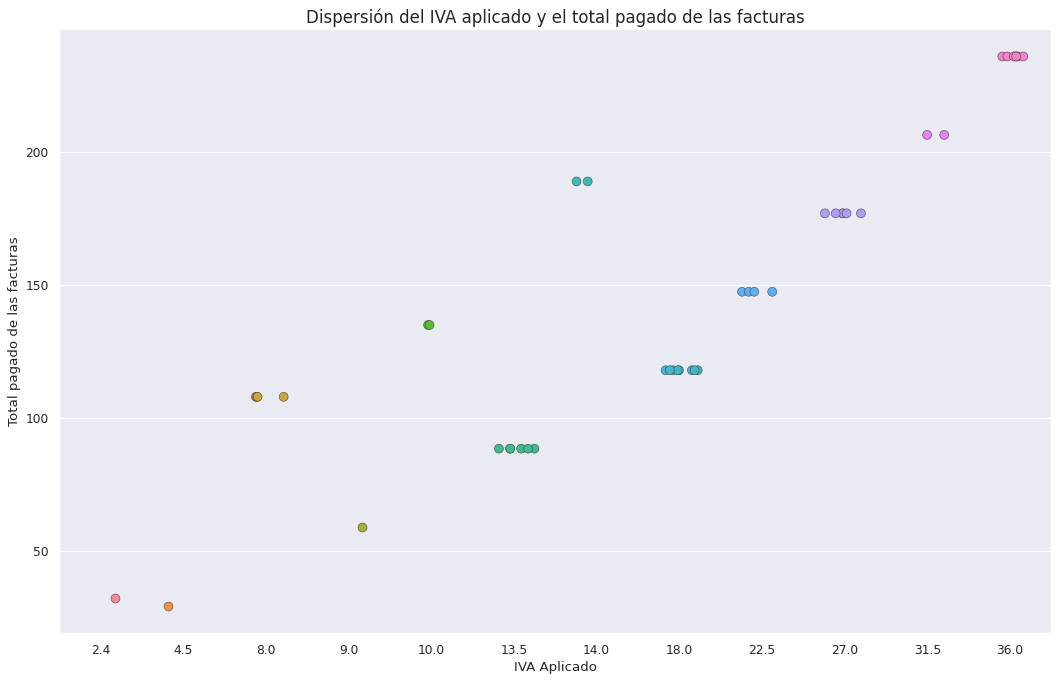

In [28]:
# Definiendo los ejes
import warnings
warnings.filterwarnings("ignore")
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)    
sns.stripplot(df['IVA'], df['total_pagado'], jitter=0.25, size=8, ax=ax, linewidth=.5)

# Decoraciones
plt.title("Dispersión del IVA aplicado y el total pagado de las facturas", fontsize=15)
plt.xlabel("IVA Aplicado") 
plt.ylabel("Total pagado de las facturas")
plt.show()

In [38]:
print(df[['IVA', 'total_pagado', 'porcentaje_IVA']])

     IVA  total_pagado  porcentaje_IVA
0   18.0         118.0              18
1   27.0         177.0              18
2   13.5          88.5              18
3   36.0         236.0              18
4   22.5         147.5              18
5    8.0         108.0               8
6   14.0         189.0               8
7   36.0         236.0              18
8   18.0         118.0              18
9   18.0         118.0              18
10  27.0         177.0              18
11  13.5          88.5              18
12  36.0         236.0              18
13  22.5         147.5              18
14   8.0         108.0               8
15  31.5         206.5              18
16  18.0         118.0              18
17  27.0         177.0              18
18  13.5          88.5              18
19  36.0         236.0              18
20  10.0         135.0               8
21  18.0         118.0              18
22  27.0         177.0              18
23  13.5          88.5              18
24  36.0         236.0   

**Análisis:** en el gráfico de dispersión se puede observar como por lo ***general*** entre más alta es la factura más el cliente tiene que pagar de IVA, en este caso se puede observar que un cliente que debe una factura por 32.4 euros, tiene que pagar 2.4 euros de IVA, mientras que una persona que tiene que pagar una factura por 236 euros debe pagar 36 euros de IVA y así se puede ver con la mayoría de puntos en el gráfico.

Con algunos, -como la factura que hay de 135 euros-, solo hay que pagar 10 euros, mientras que con la factura que hay por 88.5 euros hay que pagar 13.5 euros, esto se explica porque algunas facturas tienen un porcentaje de IVA de 8% (reducido) mientras que otras de un 18% (normal), ya que algunos productos cuando son de canasta básica pagarán un IVA reducido, mientras que otros que no lo son pagarán más, y esto se corrobora viendo el gráfico ya que se ven dos líneas, una más baja y otras más alta, pero como podemos ver ambas líneas crecen, es decir, ambas variables poseen una dependencia funcional y además, una relación lineal. 
* Dichos valores exactos se corroboraron con la tabla de arriba.

**Determina el valor de la covarianza de ambas variables.**


In [39]:
a = df['IVA']
b = df['total_pagado']

covarianza_2 = np.cov(a, b, ddof=0)[0][1]
covarianza_2

515.0628345679012

**Análisis:** Viendo los valores observamos  que estos no están estandarizados (como sí sucede con la correlación), por consiguiente, la covarianza puede ir desde infinito negativo hasta infinito positivo, de ahí que el valor de la covarianza para ambas variables es de 515.0628 (covarianza poblacional).  

Por último podemos decir que las variables IVA y Total Pagado varían en el mismo sentido (ya que 𝜇𝑥𝑦 > 0). Las dos variables crecen o decrecen a la vez (nube de puntos creciente). Por ejemplo, entre más elevada es una factura mayor será el IVA a pagar (en la mayoría de los casos). 